# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [28]:
from platform import python_version
print(python_version())

3.7.1


In [29]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [30]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.

X, Y = fetch_openml('mnist_784', return_X_y=True , cache=False)
Y = Y.astype(int)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

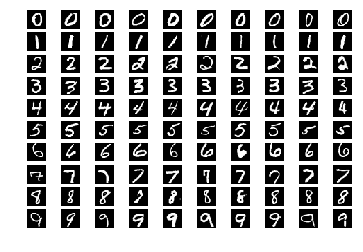

In [33]:
def P1(num_examples=10):

    # Function to take a parameter of n = number of example images to print from MINST dataset and then
    # print an n x n matrix of sample images.
      
    column = num_examples
    row = num_examples
    image_count = 0
    
    # loop for the rows.  current_digit is the current image being printed from 0 to num_examples
    for current_digit in range (row):                       
        k = 0
        
     # loop for the columns to print per row. Keep reading until you find current_digit then print.   
        for i in range (column):                               
            while mini_train_labels[k] != current_digit:   
                k += 1                                         
            else:
                image = mini_train_data[k].reshape(28, 28) 
                plt.subplot(row, column, image_count+1)    
                plt.imshow(image, cmap='gray')             
                plt.axis('off')                            
                image_count += 1
                k += 1 

    plt.show()

### MAIN ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [10]:
def P2(k_values):

# Function to train a KNN Classifier on mini-training data set and report accuracy on a dev data set 
# for a parameter of k_values passed into P2 (k=1,3,5,7,9 in this case). Print a classification report for K=1
    k=1
    print ("Development Data Set Accuracy for Varying Levels of k")
    print()
    
    # For each K value, set K, fit the model and score the model (using dev_data_)
    for k in k_values:
        classifier = KNeighborsClassifier(n_neighbors=k)                               
        classifier.fit(mini_train_data, mini_train_labels)                             
        print ("Accuracy with k =",k, "is", classifier.score(dev_data, dev_labels)) 

    # Print a classificaion report for K=1 with dev_data    
    k=1
    classifier = KNeighborsClassifier(n_neighbors=k)                                   
    classifier.fit(mini_train_data, mini_train_labels)                                 
    y_pred = classifier.predict(dev_data)                                           
    print()
    print ("Classification Report with k=1")
    print(classification_report(dev_labels, y_pred))                                   

    
### MAIN ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Development Data Set Accuracy for Varying Levels of k

Accuracy with k = 1 is 0.884
Accuracy with k = 3 is 0.876
Accuracy with k = 5 is 0.882
Accuracy with k = 7 is 0.877
Accuracy with k = 9 is 0.875

Classification Report with k=1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



ANSWER:With K = 1 the most difficult digit to classify is 8.  The f-1 score is the lowest for 8.  83% of the time, the classifier is not labeling digits as an 8 which are not an 8 (precision).  Only 77% of the time, it is correctly classifying the digit 8 as an 8 from the data set (recall).  With digit 9, I do note that the precision is the lowest of any digit, but the recall is much higher than the digit 8, so overall it performs better.  

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [11]:
def P3(train_sizes, accuracies):

# Function to measure prediction accuracy and prediction time at various training sizes.
# Accepts the training_sizes and accumulates a list of accuracies to be used later.  

    k=1
    print("Training Set Size   ", "Accuracy   ", "Prediction Time (seconds)")
    for i in train_sizes:
        classifier = KNeighborsClassifier(n_neighbors=k)                               
        classifier.fit(train_data[0:i], train_labels[0:i])
        start_time = time.time() 
        y_pred = classifier.predict(dev_data) 
        end_time = time.time()
        score = classifier.score(dev_data, dev_labels)
        print('{:10} {:16.3f} {:20.8f}'.format(i, score, end_time - start_time))
        accuracies.append(score)

    return

### MAIN ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)


Training Set Size    Accuracy    Prediction Time (seconds)
       100            0.702           0.13068414
       200            0.791           0.24951720
       400            0.811           0.49939013
       800            0.866           1.10038185
      1600            0.905           2.09145093
      3200            0.927           4.25234294
      6400            0.939           8.64120197
     12800            0.952          16.05651999
     25000            0.962          32.44500709


The above report is self-explanatory.  The accuracy increases as we have more data to train on as expected.  The prediction time is increasing with data size in most cases close to linearly.  

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [22]:
def P4():

# Linear regression function to predict the accuracy of a KNN classifier from training data size.
# train_sizes and accuracies computed in the prior cells

    # Make X a vector for linear regression method
    train_sizes_np = []
    for i in range (0, len(train_sizes)):
        train_sizes_np.append([train_sizes[i]])

    X = np.array(train_sizes_np)
    y = np.array(accuracies)
    reg = LinearRegression().fit(X, y)

    print("The regression score (R2) of a linear model that predicts accuracy from training size is {:.2f}.".format(reg.score(X, y)))
    print("For training size=60000, the predicted accuracy of this model is {:.0f}%.".format(reg.predict(np.array([[60000]]))[0]*100))

    # Transform the model to predict on the log of the training data size and accuracies
    reg.fit(np.log(X), y)
    print()
    print("The R2 of a linear model that predicts accuracy from log of training size is: {:.2f}.".format(reg.score(np.log(X), y)))
    print("For training size=60000, the predicted accuracy of this model is {:.0f}%.".format(reg.predict(np.array([[np.log(60000)]]))[0]*100))
    

### MAIN ###

P4()

The regression score (R2) of a linear model that predicts accuracy from training size is 0.42.
For training size=60000, the predicted accuracy of this model is 124%.

The R2 of a linear model that predicts accuracy from log of training size is: 0.91.
For training size=60000, the predicted accuracy of this model is 103%.


ANSWER: The linear regression model does not work very well for predicting accuracy with an R2 of .42 and accuracy of 124%.  This is due to the fact that the relationship between sample size and accuracy is not linear.  This is shown in the first graph below.  The model can be made more predictive by transforming the independent variable with a log function.  This compacts the data more and gives us a much closer fit as can be seen from the R2 of .91 and accuracy score of 103%.  

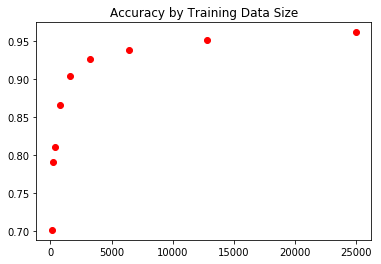

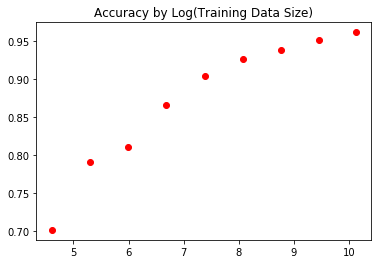

In [38]:
# Plot the original data
plt.title("Accuracy by Training Data Size")
plt.plot(train_sizes, accuracies, 'ro')
plt.show()

# Plot the log data
plt.title("Accuracy by Log(Training Data Size)")
plt.plot(np.log(train_sizes), accuracies, 'ro')
plt.show()


I also tried other techniques to improve the accuracy of the regression but none worked.  In particular, I tried log odds and logisitic regression techniques as shown below in these tests.

In [51]:
def p4test():
# Make X a vector for linear regression method  
    
    # I tried using the distance between the X axis points instead of the raw value to predict accuracy
    accuracies_np = accuracies
    train_sizes_np = [[train_sizes[0]]]
    for i in range (1, len(train_sizes)):
        train_sizes_np.append([train_sizes[i] - train_sizes[i-1]])
    
    # print values
    print ("X and Y Axis Values for Test Training Size Differences and Accuracies")
    print(train_sizes_np)
    print(accuracies_np)
    print()

    X = np.array(train_sizes_np)
    y = np.array(accuracies_np)
    reg = LinearRegression().fit(X, y)

    print("The regression score (R2) of a linear model that predicts accuracy from training size X axis differences is {:.2f}.".format(reg.score(X, y)))
    print("For training size=60000, the accuracy of this model is {:.0f}%.".format(reg.predict(np.array([[60000]]))[0]*100))
    print()
 

    # I tried using the distance between the X axis points instead of the raw value to predict accuracy  
    train_sizes_np = []
    for i in range (0, len(train_sizes)):
        train_sizes_np.append([train_sizes[i]])
        
    accuracies_np = [accuracies[0]]
    for i in range (1, len(accuracies)):
        accuracies_np.append(accuracies[i] - accuracies[i-1]) 

    # print values
    print ("X and Y Axis Values for Test Training Sizes and Accuracy Differences")
    print(train_sizes_np)
    print(accuracies_np)
    print()

    X = np.array(train_sizes_np)
    y = np.array(accuracies_np)
    reg = LinearRegression().fit(X, y)

    print("The regression (R2) of a linear model that predicts accuracy from training size with Y axis differences is {:.2f}.".format(reg.score(X, y)))
    print("For training size=60000, the accuracy of this model is {:.0f}%.".format(reg.predict(np.array([[60000]]))[0]*100))
    print()    

    
    # I tried using the log of the predicted accuracy over (1 - predicted accuracy) instead of the raw value to predict accuracy  
    accuracies_np = []
    for i in range (0, len(accuracies)):
        accuracies_np.append(np.log((accuracies[i]/(1-accuracies[i])))) 
        
    # print values
    print ("X and Y Axis Values for Test Training Sizes and Accuracy/(1-Accuracy)")
    print(train_sizes_np)
    print(accuracies_np)
    print()
    
    X = np.array(train_sizes_np)
    y = np.array(accuracies_np)
    reg = LinearRegression().fit(X, y)

    print("The regression score (R2) of a linear model that predicts accuracy from training size is {:.2f}.".format(reg.score(X, y)))
    print("For training size=60000, the accuracy of this model is {:.0f}%.".format(reg.predict(np.array([[60000]]))[0]*100))

p4test()

X and Y Axis Values for Test Training Size Differences and Accuracies
[[100], [100], [200], [400], [800], [1600], [3200], [6400], [12200]]
[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.962]

The regression score (R2) of a linear model that predicts accuracy from training size X axis differences is 0.42.
For training size=60000, the accuracy of this model is 168%.

X and Y Axis Values for Test Training Sizes and Accuracy Differences
[[100], [200], [400], [800], [1600], [3200], [6400], [12800], [25000]]
[0.702, 0.08900000000000008, 0.020000000000000018, 0.05499999999999994, 0.039000000000000035, 0.02200000000000002, 0.0119999999999999, 0.013000000000000012, 0.010000000000000009]

The regression (R2) of a linear model that predicts accuracy from training size with Y axis differences is 0.09.
For training size=60000, the accuracy of this model is -34%.

X and Y Axis Values for Test Training Sizes and Accuracy/(1-Accuracy)
[[100], [200], [400], [800], [1600], [3200], [6400], [1

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix


CONFUSION MATRIX FOR 1-NN MODEL RUN WITH DEVELOPMENT DATASET

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

Here are three example 4 digits that were classified as the digit 9:


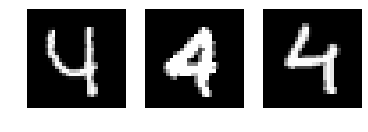


Here are three example 9 digits that were classified as the digit 4:


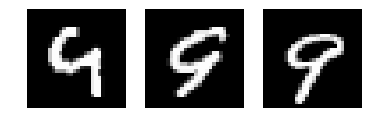

In [57]:
def P5():

    #Function to create a confusion matrix of digits from our dev data, ID the most confused digits and print 3 examples.

    # Fit a 1-NN model
    k=1
    classifier = KNeighborsClassifier(n_neighbors=k)                            
    classifier.fit(mini_train_data, mini_train_labels)                            
    y_pred = classifier.predict(dev_data)                                           

    # Output a confusion matrix for the dev_data
    print ()
    print ("CONFUSION MATRIX FOR 1-NN MODEL RUN WITH DEVELOPMENT DATASET")
    print ()
    print (confusion_matrix(dev_labels, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,]))     
    print()

    # We can see from the confusion matrix that 4s are being misclassified as 9s most commonly.
    # Capture the list of confused 4s
    list_of_confused_4 = []
    for i in range (0, len(dev_labels)):                                            
        if dev_labels[i] == 4 and y_pred [i] == 9:
            list_of_confused_4.append(i)

    # Print 3 examples of confused digits        
    print ("Here are three example 4 digits that were classified as the digit 9:")

    for i in range (3):                                                            
        image = dev_data[list_of_confused_4[i]].reshape(28, 28)                  
        plt.subplot(1, 3, i+1)                                              
        plt.imshow(image, cmap='gray')                                            
        plt.axis('off')                                                            
    
    plt.show()
    
    # Let's also look at the corresponding 9 digits confused as 4s
    list_of_confused_9 = []
    for i in range (0, len(dev_labels)):                                           
        if dev_labels[i] == 9 and y_pred [i] == 4:
            list_of_confused_9.append(i)

    # Print 3 examples of confused digits
    print()
    print ("Here are three example 9 digits that were classified as the digit 4:")

    for i in range (3):                                                            
        image = dev_data[list_of_confused_9[i]].reshape(28, 28)                    
        plt.subplot(1, 3, i+1)                                                     
        plt.imshow(image, cmap='gray')                                             
        plt.axis('off')                                                            
    
    plt.show()

### MAIN ###

P5()

According to the confusion matrix, the most confused pair of digits are 4 and 9. 4 is confused for the digit 9 eleven times and 9 is confused for the digit 4 three times for a total of 14 inaccurate predictions on these digits.  



(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [52]:
def knn_classifier (k, train_data, train_labels, test_data, test_labels):

    # KNN classifer function that accepts k, the training data and labels and test data and labels and prints accuracy.
    
    classifier = KNeighborsClassifier(n_neighbors=k)                                   
    classifier.fit(train_data, train_labels)                                           
    print ("Accuracy with k =",k, "is", classifier.score(test_data, test_labels))        
    return

def blur_function (row, data_set):                             

    # This is a function to blur an image by averaging the surround pixels. It accepts the dataset we will blur as a parameter and the current
    # row of the image we are processing from the file (0-999).  We reshape that 784 pixel row in this function to 28x28 and average pixel weights.
    # The function returns a row in the original format of 784 pixels per row.
    
    # Performance note - I wrote this function to be intuitive and easy to understand with simple ifs doing special case averaging
    # where we do not have 8 surrounding pixels to average.  After dealing with special cases, we drop into the most common case for rows
    # 1-26 and columns 1-26.  Since our data sizes are small, this works just fine.  However, if we wanted to increase data size
    # a simple fix to eliminate running so many conditional ifs is to move the last averaging line to the beginning and place it under
    # an if to determine you are not in a special case situation which is the case 90% of the time.  It will eliminate much processing but is
    # to me not quite as intuitive.  
    
    dataset_28 = data_set.reshape(1000,28,28)
    data_row = np.empty_like (dataset_28[row]) 

    # i is the row number and j is the column in a 28x28 matrix
    for i in range (0, 28):
        for j in range (0,28):
  
            # These first 3 ifs deal with averaging the special cases of the first row and the two corners in the first row
            if i == 0 and j == 0:
                data_row[i,j] = (dataset_28[row,i,j] + dataset_28[row,i,j+1] + dataset_28[row,i+1,j] + dataset_28[row,i+1,j+1])/4
                continue
            if i == 0 and j == 27:
                data_row[i,j] = (dataset_28[row,i,j] + dataset_28[row,i,j-1] + dataset_28[row,i+1,j] + dataset_28[row,i+1,j-1])/4
                continue
            if i == 0:
                data_row[i,j] = (dataset_28[row,i,j] + dataset_28[row,i,j-1] + dataset_28[row,i,j+1] + dataset_28[row,i+1,j] + dataset_28[row,i+1,j-1] + dataset_28[row,i+1,j+1])/6
                continue

            # These second 3 ifs deal with averaging the special cases of the last row and the two corners in the last row   
            if i == 27 and j == 0:
                data_row[i,j] = (dataset_28[row,i,j] + dataset_28[row,i,j+1] + dataset_28[row,i-1,j] + dataset_28[row,i-1,j+1])/4
                continue
            if i == 27 and j == 27:
                data_row[i,j] = (dataset_28[row,i,j] + dataset_28[row,i,j-1] + dataset_28[row,i-1,j] + dataset_28[row,i-1,j-1])/4
                continue
            if i == 27:
                data_row[i,j] = (dataset_28[row,i,j] + dataset_28[row,i,j-1] + dataset_28[row,i,j+1] + dataset_28[row,i-1,j] + dataset_28[row,i-1,j-1] + dataset_28[row,i-1,j+1])/6
                continue

            # These 2 ifs deal with averaging the special cases of the non-corners of the first column and the last column  
            if j == 0:
                data_row[i,j] = (dataset_28[row,i,j] + dataset_28[row,i-1,j] + dataset_28[row,i-1,j+1] + dataset_28[row,i,j+1] + dataset_28[row,i+1,j+1] + dataset_28[row,i+1,j])/6
                continue
            if j == 27:
                data_row[i,j] = (dataset_28[row,i,j] + dataset_28[row,i-1,j] + dataset_28[row,i-1,j-1] + dataset_28[row,i,j-1] + dataset_28[row,i+1,j-1] + dataset_28[row,i+1,j])/6
                continue

            # For everything else in the middle of the matrix, we average the 8 surrounding pixels, the target pixel and divide by 9
            data_row[i,j] = (dataset_28[row,i,j] + dataset_28[row,i-1,j] + dataset_28[row,i-1,j-1] + dataset_28[row,i-1,j+1] + dataset_28[row,i,j-1] + dataset_28[row,i,j+1] + dataset_28[row,i+1,j] + dataset_28[row,i+1,j-1] + dataset_28[row,i+1,j+1])/9

    return data_row.reshape(784)

                                  
                                  
def gaussian_blur (num_rows, num_cols, data_set):
    
    ### Function accepts a data set of images and returns a blurred version of the data set.  parameters are the data set,
    ### number of rows and number of columns.
    
    blur_data = np.empty_like (data_set)       # define a new blur_data numpy array and copy the given data set
    blur_data[:] = data_set
    for row in range (0, num_rows):         # Process the number of rows given in the data set
        blur_data[row] = blur_function (row, data_set)  # send in the row and the full data set for surrounding rows
                                                                    
    return blur_data


### MAIN

# This program smooths an image by blurring to improve model predictive accuracy. The value of a particular pixel
# is estimated as the weighted combination of the original value and the values around it above, below, left and right.  
# The program reports accuracy improvements for blurring dev data only, training data only and both dev and training data.

rows = 1000
columns = 784
k=1

# Run the KNN classifer and report accuracy on the original unblurred data

print("KNN classifier with original data")
knn_classifier (k, mini_train_data, mini_train_labels, dev_data, dev_labels)

# Run the KNN classifier on blurred development data only 

print()
print("KNN classifier with blurred dev data only")
blur_dev = np.empty_like (dev_data)
blur_dev = gaussian_blur (rows, columns, dev_data)

knn_classifier (k, mini_train_data, mini_train_labels, blur_dev, dev_labels)

# Run the KNN classifier on blurred training data only
print()
print("KNN classifier with blurred training data only")

blur_train = np.empty_like (mini_train_data)
blur_train = gaussian_blur (rows, columns, mini_train_data)

knn_classifier (k, blur_train, mini_train_labels, dev_data, dev_labels)

# Run the KNN classifier on blurred training data and development data

print()
print("KNN classifier with blurred training and dev data")

knn_classifier (k, blur_train, mini_train_labels, blur_dev, dev_labels)


KNN classifier with original data
Accuracy with k = 1 is 0.884

KNN classifier with blurred dev data only
Accuracy with k = 1 is 0.868

KNN classifier with blurred training data only
Accuracy with k = 1 is 0.908

KNN classifier with blurred training and dev data
Accuracy with k = 1 is 0.904


ANSWER:  This Blur filter is improving the accuracy when compared to the orignal KNN classifier.  But these results show that the filter must be applied to the training data to gain the performance improvements.  Just blurring the development data (or test data) without training the model to understand this makes performance worse.  Once the model is trained with blurred data, the improvement in accuracy is over 2%.  


(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [53]:
def P7():

    # NB Classifier with binned data function.  The model shows binning mini_train_data into 0,1 bins and then into 3 bins.
    # The results are reported.  
    
    X = mini_train_data
    y = mini_train_labels
    clf = BernoulliNB(alpha=0.5,binarize=0.5)
    clf.fit(X, y)
    print("Naive Bayes Classifier Accuracy Score (BernoulliNB) on Dev Data with Pixel Values Mapped to 0/1")
    print(clf.score(dev_data, dev_labels))

    # Preprocess Training Data divide into bins by values of <=1/3, <=2/3 or other 
    mini_train_bin = np.empty_like (mini_train_data)
    for i in range (0, len(mini_train_data)):
        for j in range (0,784):
            if mini_train_data[i,j] <= 1/3:
                mini_train_bin[i,j] = 0
                continue
            if mini_train_data[i,j] > 1/3 and mini_train_data[i,j] <= 2/3:
                mini_train_bin[i,j] = 1
                continue
            else:
                mini_train_bin[i,j] = 2        

     # Preprocess Dev Data divide into bins by values of <=1/3, <=2/3 or other 
    dev_data_bin = np.empty_like (dev_data)
    for i in range (0, len(dev_data)):
        for j in range (0,784):
            if dev_data[i,j] <= 1/3:
                dev_data_bin[i,j] = 0
                continue
            if dev_data[i,j] > 1/3 and dev_data[i,j] <= 2/3:
                dev_data_bin[i,j] = 1
                continue
            else:
                dev_data_bin[i,j] = 2        
                
    X = mini_train_bin
    y = mini_train_labels
    clf = MultinomialNB(alpha=.5)
    clf.fit(X, y)
    print()
    print("Naive Bayes Classifier Accuracy Score (MultinomialNB) on Dev Data with Pixel Values Mapped to 0/1/2")
    print(clf.score(dev_data_bin, dev_labels))

### MAIN ###

P7()

Naive Bayes Classifier Accuracy Score (BernoulliNB) on Dev Data with Pixel Values Mapped to 0/1
0.822

Naive Bayes Classifier Accuracy Score (MultinomialNB) on Dev Data with Pixel Values Mapped to 0/1/2
0.816


ANSWER: The mulinomial model did not improve the accuracy with these settings and binning.  I do note that if I change binarize settings on the Bernoulli model to very low thresholds to determine when a pizel becomes a 1, that the performance decreases to the multinomial level.  The accuracy would appear to be related to the fact of whether the pixels have stronger color or not.   

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [84]:
def P8(alphas):

### Function uses GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) 
### in a Bernoulli NB model. Accepts as a parameter the values of alpha to test with as a dictionary.
### mini_train_data and mini_train_labels are used.  

    model = BernoulliNB(binarize=0.000001)
    grid = GridSearchCV(estimator=model, param_grid=alphas, cv=3)
    grid.fit(mini_train_data, mini_train_labels)
#    print(grid)

# summarize the results of the grid search 
    print()
    print("Best Score for Varying Alpha Levels with BernoulliNB Model, mini_train data:", "Accuracy Score =", grid.best_score_)
    print("Best Alpha Value to Choose on BernoulliNB for this Test:", grid.best_estimator_.alpha)
    results = grid.cv_results_ 
    print("BernoulliNB Accuracy with Alpha=0 with Training Data on GridSearchCV Testing: ", "Accuracy Score =", grid.cv_results_['mean_test_score'][0])
    print()

### MAIN ###

# First fit a BernoulliNB model and produce predictions on dev_data with Alpha = 0
X = mini_train_data
y = mini_train_labels
clf = BernoulliNB(alpha=0.0, binarize=0.000001)
clf.fit(X, y)
print("Initial predicitions on dev_data with BernoulliNB Model and Alpha=0.", "Accuracy Score =", clf.score(dev_data, dev_labels))
print()

# Use GridSearchCV to determne the best Alpha Value
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)


/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Initial predicitions on dev_data with BernoulliNB Model and Alpha=0. Accuracy Score = 0.816


Best Score for Varying Alpha Levels with BernoulliNB Model, mini_train data: Accuracy Score = 0.823
Best Alpha Value to Choose on BernoulliNB for this Test: 0.01
BernoulliNB Accuracy with Alpha=0 with Training Data on GridSearchCV Testing:  Accuracy Score = 0.804



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ANSWER:  The best setting for alpha is 0.01 as you achieve the best accuracy score at that setting.  With Alpha = 0 the accuracy is .804 which is less than the best accuracy score of 0.823 with alpha = 0.01.   This is as expected as theoretically, by increasing the Lidstone smoothing parameter, we are compensating more strongly for absent features negating the absence of a feature more vigorously.   

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [85]:
def P9():

    # Function to train a model using GuassianNB and evaluate it on the dev_data. 
    X = mini_train_data
    y = mini_train_labels
    clf = GaussianNB(priors=None, var_smoothing=1e-09)
    clf.fit(X, y)
    print("Accuracy Score of GaussianNB with var_smoothing = 1e-09 is: ", clf.score(dev_data, dev_labels))
    print()

    # We note that this model does not perform well.  Let's diagnose why by printing and looking at Sigmas.
    for i in range(10):
    #    print("Theta of ", i, " ", clf.theta_[i])
    #    print("sigma of ", i, " ", clf.sigma_[i])

        avg = 0
        for j in range (0,784):
            avg = avg + clf.sigma_[i][j]
        avg = avg/784
        print ("Average Sigma Value for Digit {:1} is {:.6f}.".format(i, avg))


    # Use GridsearchCV to determine a better parameter value for var_smoothing to imporve the accuaracy since the sigmas are so low
    var_smoothing = {'var_smoothing': [0.0, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]}
    model = GaussianNB(priors=None)
    grid = GridSearchCV(estimator=model, param_grid=var_smoothing)
    grid.fit(mini_train_data, mini_train_labels)
    print(grid)

    # Summarize the results of GridSearchCV
    print()
    print("GridSearchCV Best var_smoothing Recommendation and Accuracy Score Prediction on Training Data")
    print("Best Score:", grid.best_score_)
    print("Best var_smoothing:", grid.best_estimator_.var_smoothing)
    print()

    # Plug the best var_smoothing parameter of .1 back into GaussianNB to produce a comparable accuracy score
    X = mini_train_data
    y = mini_train_labels
    clf = GaussianNB(priors=None, var_smoothing=1e-01)
    clf.fit(X, y)
    print("Accuracy Score of GaussianNB with var_smoothing = .1 is: ", clf.score(dev_data, dev_labels))
    print(clf.get_params)

### MAIN ###

gnb = P9()

Accuracy Score of GaussianNB with var_smoothing = 1e-09 is:  0.593

Average Sigma Value for Digit 0 is 0.060693.
Average Sigma Value for Digit 1 is 0.027791.
Average Sigma Value for Digit 2 is 0.066256.
Average Sigma Value for Digit 3 is 0.058298.
Average Sigma Value for Digit 4 is 0.052561.
Average Sigma Value for Digit 5 is 0.059837.
Average Sigma Value for Digit 6 is 0.051897.
Average Sigma Value for Digit 7 is 0.046266.
Average Sigma Value for Digit 8 is 0.056812.
Average Sigma Value for Digit 9 is 0.049561.


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:43

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'var_smoothing': [0.0, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV Best var_smoothing Recommendation and Accuracy Score Prediction on Training Data
Best Score: 0.797
Best var_smoothing: 0.1

Accuracy Score of GaussianNB with var_smoothing = .1 is:  0.817
<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=0.1)>


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ANSWER: I trained a model using GuassianNB on mini-train data and and evaluated on the dev data. The accuracy is only around 59%. If you examine the sigmas, of the data, the standard deviation is extremely small around the blank spaces of the images.  If we smooth this data we may get a better result.  By using GridSearchCV to estimate potentially a better var_smoothing parameter, I learned that by changing smoothing from 1e-09 to 1e-01, I could return the model to about the same accuracy rate (81.7%) as the BernoulliNB model results in problem 8 above. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

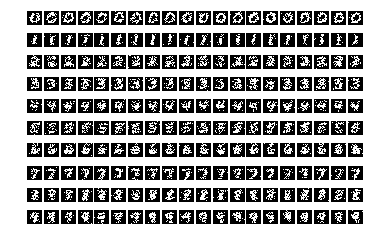

In [91]:
def P10(num_examples):

    #Fit Naive Bayes Classifier from mini_train_data and predict on dev_data

    X = mini_train_data
    y = mini_train_labels
    clf = BernoulliNB(alpha=0.5,binarize=0.000001)
    clf.fit(X, y)
    y_predict = clf.predict(dev_data)

    # Build grid for each of 10 digits
    for i in range(10):
        for j in range(num_examples):
            # Process each digit (0-9) X 20 of them
            matrix = np.exp(clf.feature_log_prob_[i])

            # Go through each probability matrix item (k) and compare each pixel with a random number n.
            # if probability greater than n set the pixel to 1, else 0
            for k, pixel_prob in enumerate(matrix):
                n = np.random.rand()
                if pixel_prob > n:
                    matrix[k] = 1
                else:
                    matrix[k] = 0

            #  Plot each digit
            plt.subplot(10, 20, (i*20) + (j+1))
            plt.axis('off')
            plt.imshow(matrix.reshape(28,28), cmap='gray')

    plt.show()

### MAIN ###

P10(20)

ANSWER: How do the generated digits compare to the training digits?  The generated digits are blurier than the training digits.  This is because we are applying even greater levels of uncertainty to the predicition of each pixel (which is in itself, already uncertain).  We are using a random number generator and deciding if a pixel should be turned on if it's value is greater than the random value from the generator.  This increases noise in the predicition and lowers the quality.  

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [92]:
def P11(buckets, correct, total):

    # Train a BernoulliNB model with mini_train_data and predict on dev_data
    
    X = mini_train_data
    y = mini_train_labels
    clf = BernoulliNB(alpha=0.5,binarize=0.000001)
    clf.fit(X, y)
    y_predict = clf.predict(dev_data)
    
    #generate the 1000 length probability matrix for each digit 10 wide
    prob = clf.predict_proba(dev_data)    

    # generate a 1000 length vector of the best probability for each predicition
    for i in range (len(y_predict)): max_prob [i] = prob[i][y_predict[i]]      
    
    # bucket the 1000 probabilities into the probability buckets, bins is the bin number each prob is in.
    bins = np.digitize(max_prob, buckets, right=True)     
    
    # accumulate totals for the 9 bins
    for i in bins: total[i] += 1       

     # accumulate correct counts for the 9 bins   
    for i in range (len(y_predict)): 
        if y_predict[i] == dev_labels[i]: 
            correct[bins[i]] += 1
               
### MAIN ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]
max_prob = [0 for i in dev_labels]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

print() 
print("Checks")
sum = 0    
for n in total: sum = sum + n
print("Sum of Totals by Bin:", sum)

sum = 0    
for n in correct: sum = sum + n
print("Count of Corrects =", sum, "which Equals the Accuracy Score when Divided by 1000 of", clf.score(dev_data, dev_labels))  

p(pred) <= 0.5000000000000    total =   1    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  31    accuracy = 0.387
p(pred) <= 0.9990000000000    total =  75    accuracy = 0.413
p(pred) <= 0.9999900000000    total =  62    accuracy = 0.500
p(pred) <= 0.9999999000000    total =  52    accuracy = 0.615
p(pred) <= 0.9999999990000    total =  55    accuracy = 0.745
p(pred) <= 0.9999999999900    total =  41    accuracy = 0.707
p(pred) <= 0.9999999999999    total =  53    accuracy = 0.811
p(pred) <= 1.0000000000000    total = 630    accuracy = 0.948

Checks
Sum of Totals by Bin: 1000
Count of Corrects = 816 which Equals the Accuracy Score when Divided by 1000 of 0.816


ANSWER:I would characterized the calibration of this model to be weakly calibrated.  There is definitely a correlation between posterior probability and the accuracy so it is not poorly calibrated. It is not strongly calibrated as when the posterior probability is in the 90-99.9% range, the accuracy is only 41.3% and even lower in the 50-90% range.  So I believe it to be weakly calibrated as when the posterior probability of the model increases, so does the accuracy in all cases except one (the step between bin 6 and 7 where accuracy goes down from .745 to .707.)   

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [81]:
def P12():

    # 4s and 9s were the most confused digits in this data set. This is due to the similarity in the shape of the 2 digits.
    # There is one key difference in the shape; the 4 will be open on the top where the 9 would have a continuous line.  
    # That should result in the 9 having more pixel values in those columns.  This function will try and improve accuracy 
    # by focusing on that difference and summing the column pixel values of each digit as a new piece of information and 
    # storing that data in a new row 29 as the sum of each column.  Our matrix size is now 29X28.  The function accepts a 
    # data set parameter and returns a modified data set. 
    
    def distiguish_4_and_9(data_set):
        
        # This function initializes an array, stores the original pixels and adds a new 29th row of summed columns.
        
        enhanced_data_set = np.zeros((len(data_set), 29, 28))
        for i in range(len(data_set)):
            enhanced_data_set[i][0:28] = data_set[i].reshape(28,28)
            enhanced_data_set[i][28] = np.sum(data_set[i].reshape(28,28), axis=0)
    
        return enhanced_data_set
    

    #Build new versions of training and development data that include the new column sum feature 
    enhanced_mini_data = distiguish_4_and_9(mini_train_data).reshape(1000,812)
    enhanced_dev_data = distiguish_4_and_9(dev_data).reshape(1000,812)

    # Fit the BernoulliNB model on the enhanced data sets
    clf = BernoulliNB(alpha=0.01, binarize=.5)
    clf.fit(enhanced_mini_data, mini_train_labels)
    print ('New model accuracy with column sum feature is: {:.3f}'.format(clf.score(enhanced_dev_data, dev_labels)))

### Main ### 

P12()

New model accuracy with column sum feature is: 0.829
